# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1: 30 баллов

* Задача 2: 30 баллов

In [ ]:
# Bot check

# HW_ID: phds_hw7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

from tqdm.notebook import tqdm

*Напоминаем, что во всех заданиях нашего курса, да и в реальной жизни, если вы получаете какие-то результаты, то надо сделать вывод!*

### Задача 1


В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём следующие датасеты:

**Профиль физика:** https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi. Будем предсказывать длительность солнечных вспышек. Используйте файл с данными до 2018 года.

**Профиль биология:** https://archive.ics.uci.edu/dataset/1/abalone. Будем предсказывать возраст моллюсков.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для отслеживания времени работы можно использовать `tqdm` в циклах.

#### Загрузка и предобработка данных:

**Физика:**

In [ ]:
data = pd.read_csv('hessi.solar.flare.UP_To_2018.csv')

In [ ]:
data.columns

Уберем категориальные признаки, а также дату и время начала и время конца вспышки:

In [ ]:
data = data.drop(['flare', 'start.date', 'start.time', 'end', 'flag.1', 'flag.2', 'flag.3', 'flag.4', 'flag.5'], axis=1)

In [ ]:
data.columns

Index(['peak', 'duration.s', 'peak.c/s', 'total.counts', 'energy.kev',
       'x.pos.asec', 'y.pos.asec', 'radial', 'active.region.ar'],
      dtype='object')

In [ ]:
X = data.drop('duration.s', axis=1)
y = data['duration.s']

**Биология:**

In [28]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Уберем категориальный признак:

In [29]:
data = data.drop('Sex', axis=1)

In [42]:
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

Разбейте данные на обучающую выборку и на валидацию, выделив на валидацию 25% данных.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию. Для того, чтобы исследовать зависимость от количества деревьев, обучите лес **один** раз и посчитайте предсказания каждого отдельного дерева в лесу. После этого используйте усреднение первых $k$ предсказаний в качестве ответа для $k$ деревьев.

In [32]:
def cum_metric(model, metric, x_test, y_test):
    '''
    Считает значение метрики в зависимости от количества деревьев в модели

    Мы не обучаем много лесов с разным кол-вом деревьев,
    а смотрим на один обученный лес. Предсказание леса из k деревьев —
    усредненное предсказание первых k деревьев из нашего леса.

    Параметры.
    1) model — модель случайного леса,
    2) metric — вычисляемая метрика,
    3) x_test — данные тестовой выборки,
    4) y_test — метки тестовой выборки.
    '''

    predictions_by_estimators = [est.predict(x_test) for est in model.estimators_] # предсказания конкретных деревьев

    cumpred = np.array(predictions_by_estimators).cumsum(axis=0) \
              / (np.arange(len(predictions_by_estimators)) + 1)[:, np.newaxis] # усреднение первых k моделей для k от 1 до n_estimators

    cumacc = [metric(y_test, pred) for pred in cumpred] # значения метрики качества для k деревьев
    return np.array(cumacc)

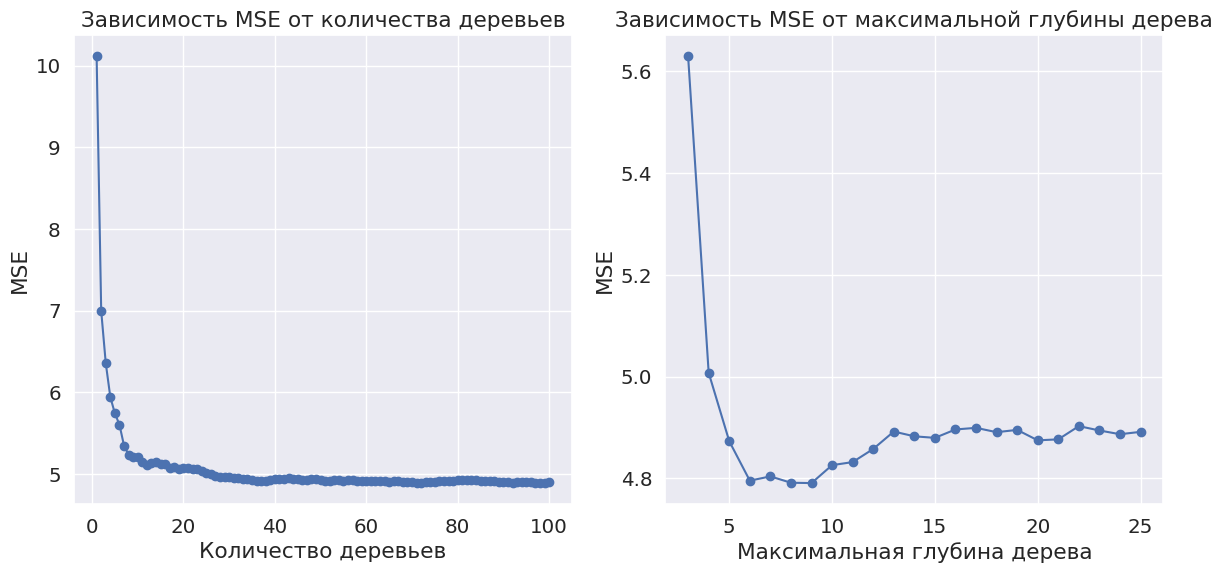

In [14]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X_train = np.array(X_train)
X_test = np.array(X_test)

n_estimators_range = range(1, 101)
mse_values_n_estimators = []

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

mse_values_n_estimators = cum_metric(model, mean_squared_error, X_test, y_test)

max_depth_range = range(3, 26)
mse_values_max_depth = []

for max_depth in max_depth_range:
    model = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values_max_depth.append(mse)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_values_n_estimators, marker='o')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества деревьев')

plt.subplot(1, 2, 2)
plt.plot(max_depth_range, mse_values_max_depth, marker='o')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MSE')
plt.title('Зависимость MSE от максимальной глубины дерева')

plt.tight_layout()
plt.show()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:**  на обоих графиках mse уменьшается. при увеличении количества деревьев: случайный лес усредняет предсказания деревьев, дисперсия уменьшается. потом график выходит на более менее плато, то есть при добавлении деревьев качество не улучшается.

при увеличении максимальной глубины: при достижении какого-то значения (чуть меньше 10) график начинает расти, это говорит о переобучении. однако в случайном лесе переобучение менее выражено по сравнению с отдельными решающими деревьями, так как случайный лес усредняет предсказания множества деревьев.



Обучите случайный лес с параметрами по умолчанию и выведите mse на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются?

In [16]:
def train_and_evaluate(X_train, y_train, X_test, y_test, random_state):
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_values = []
for i in range(3):
    mse = train_and_evaluate(X_train, y_train, X_test, y_test, random_state=i)
    mse_values.append(mse)
    print(f"Эксперимент {i+1}: MSE = {mse}")

Эксперимент 1: MSE = 4.872484593301436
Эксперимент 2: MSE = 4.910235789473685
Эксперимент 3: MSE = 4.851731578947368


**Ответ:** случайный лес использует случайные подвыборки данных и случайные подвыборки признаков для построения каждого дерева. из-за этого немного отличаются значения mse

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50]
}


rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", -grid_search.best_score_)


Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}
Лучший результат (MSE): 4.708905565766969


Выведите найденные оптимальные параметры. Поясните, согласуются ли наблюдения с теорией.

**Вывод** да, согласуются, количество деревьев большое, а глубина маленькая (чтобы не было переобучения)

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [19]:
max_depth = 10
n_estimators = 200

Оценим качество предсказаний обученного решающего леса.

In [20]:
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовой выборке:", mse)

MSE на тестовой выборке: 4.810293054495144


Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [34]:
def train_and_evaluate(max_features):
    model = RandomForestRegressor(n_estimators=100, max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


max_features_range = range(1, 9)
mse_values = []

for max_features in max_features_range:
    mse = train_and_evaluate(max_features)
    mse_values.append(mse)
    print(f"max_features = {max_features}: MSE = {mse}")

max_features = 1: MSE = 4.704595023923445
max_features = 2: MSE = 4.736856267942584
max_features = 3: MSE = 4.716326220095694
max_features = 4: MSE = 4.7542877511961725
max_features = 5: MSE = 4.794835789473685
max_features = 6: MSE = 4.857414066985646
max_features = 7: MSE = 4.894892535885168
max_features = 8: MSE = 4.894892535885168


Постройте график зависимости метрики mse на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

max_features = 1: MSE_train = 0.6680929757343552, MSE_test = 4.704595023923445
max_features = 2: MSE_train = 0.6526860791826309, MSE_test = 4.736856267942584
max_features = 3: MSE_train = 0.6584035121328224, MSE_test = 4.716326220095694
max_features = 4: MSE_train = 0.6664135376756067, MSE_test = 4.7542877511961725
max_features = 5: MSE_train = 0.6628596104725416, MSE_test = 4.794835789473685
max_features = 6: MSE_train = 0.6586475734355045, MSE_test = 4.857414066985646
max_features = 7: MSE_train = 0.6642160600255428, MSE_test = 4.894892535885168
max_features = 8: MSE_train = 0.6642160600255428, MSE_test = 4.894892535885168


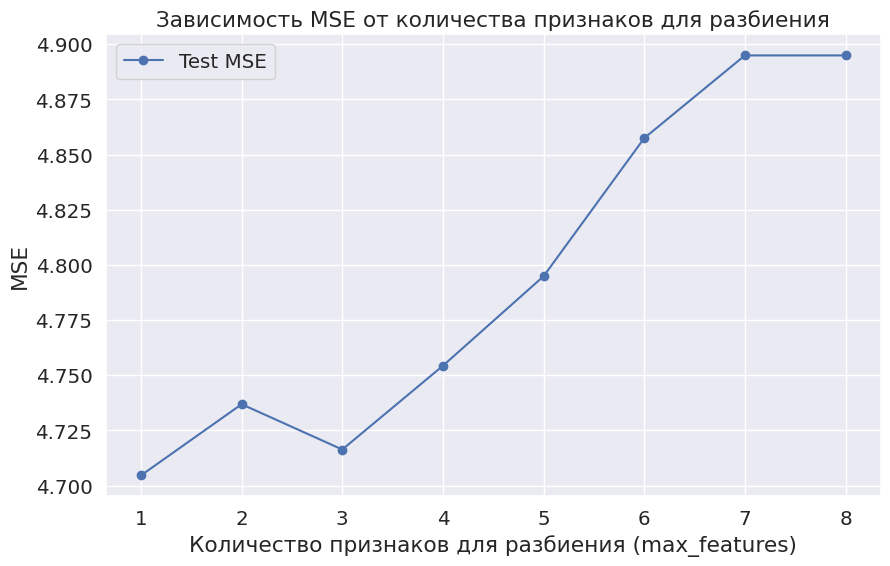

In [35]:
def train_and_evaluate(max_features):
    model = RandomForestRegressor(n_estimators=100, max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    return mse_train, mse_test


max_features_range = range(1, 9)
mse_train_values = []
mse_test_values = []

for max_features in max_features_range:
    mse_train, mse_test = train_and_evaluate(max_features)
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    print(f"max_features = {max_features}: MSE_train = {mse_train}, MSE_test = {mse_test}")


plt.figure(figsize=(10, 6))
plt.plot(max_features_range, mse_test_values, marker='o', label='Test MSE')
plt.xlabel('Количество признаков для разбиения (max_features)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков для разбиения')
plt.legend()
plt.grid(True)
plt.show()


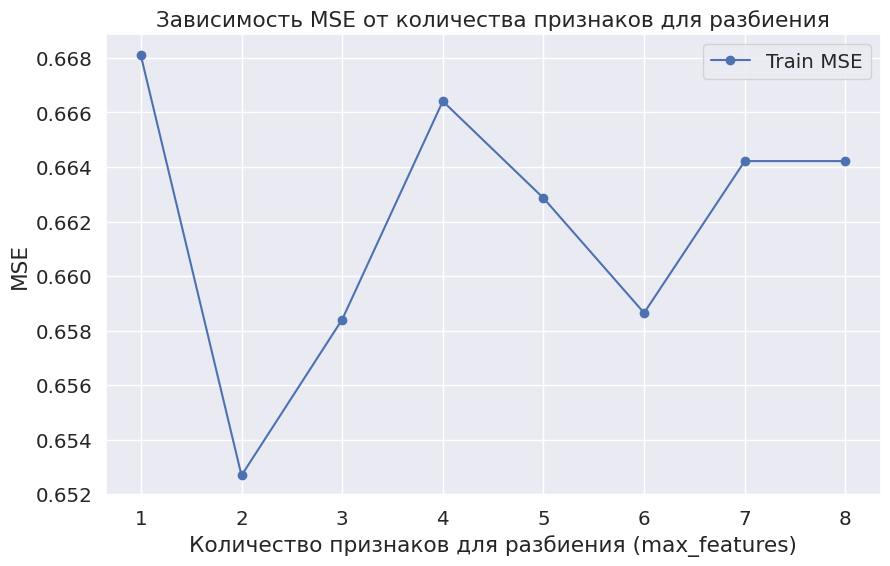

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, mse_train_values, marker='o', label='Train MSE')
plt.xlabel('Количество признаков для разбиения (max_features)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков для разбиения')
plt.legend()
plt.grid(True)
plt.show()

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

**Ответ:** на тестовой выборке: сначала слишком мало параметров, поэтому mse растет, потом модель охватывает сложные зависимости, mse палает, потом идет переобучение.

на тренировочной: все как-то сложно, сначала модель хорошо учится, охватывает сложные зависимости, потом переобучается, потом стабилизируется

Зафиксируйте наилучшие гиперпараметры.

Проведите исследование скорости обучения и предсказания.

Засеките время обучения и предсказания, например, с помощью модуля `time`.



In [37]:
import time

model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=3, random_state=42)

start_time = time.time()
model.fit(X_train, y_train)

training_time = time.time() - start_time

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

mse = mean_squared_error(y_test, y_pred)

print("MSE :", mse)
print("Время обучения:", training_time, "секунд")
print("Время предсказания:", prediction_time, "секунд")

MSE : 4.6171981965413424
Время обучения: 1.3661353588104248 секунд
Время предсказания: 0.03907132148742676 секунд


mse уменьшился по сравнению с прошлым экспериментом, ура

Посчитайте среднюю глубину дерева в случайном лесе. Используйте функцию `get_depth()` для отдельных деревьев леса.
Посчитайте среднее количество листьев, используя функцию `get_n_leaves()` для отдельных деревьев.



In [38]:
from sklearn.tree import _tree

def get_depth(tree):
    return tree.tree_.max_depth

def get_n_leaves(tree):
    return tree.tree_.n_leaves


average_depth = np.mean([get_depth(tree) for tree in model.estimators_])
average_n_leaves = np.mean([get_n_leaves(tree) for tree in model.estimators_])

print("Средняя глубина дерева:", average_depth)
print("Среднее количество листьев:", average_n_leaves)

Средняя глубина дерева: 10.0
Среднее количество листьев: 395.01


Сделайте выводы. Какие деревья обычно используются в случайном лесу? Как вы предполагаете, как от этого зависит скорость обучения и предсказания?

**Ответ** в случайном лесу обычно используются решающие деревья. каждое дерево в лесу строится независимо, используя случайные подвыборки данных и признаков.

более глубокие деревья требуют больше времени для обучения, так как необходимо сделать больше разбиений.
большее количество листьев также увеличивает время обучения, так как каждое разбиение требует вычислений.
чем больше деревьев в лесу, тем больше времени требуется для обучения, так как каждое дерево обучается независимо.


более глубокие деревья требуют больше времени для предсказания, так как необходимо пройти через большее кколичество уровней.
большее количество листьев также может увеличить время предсказания, так как необходимо пройти через больше узлов листьев.
чем больше деревьев в лесу, тем больше времени требуется для предсказания, так как необходимо усреднить предсказания всех деревьев.

Исследуйте важности признаков для следующих случаев:



*   Решающее  дерево
*   Случайный лес
*   Лес из первых 5-10 деревьев случайного леса из предыдущего пункта.

Также проанализируйте качество моделей выше.

Сделайте выводы. Отличаются ли посчитанные важности? Есть ли связь важностей признаков и качества моделей? О чем говорят посчитанные важности признаков?



MSE для решающего дерева: 9.270813397129187
MSE для случайного леса: 4.6171981965413424
MSE для леса из первых 5 деревьев: 5.331025086905695


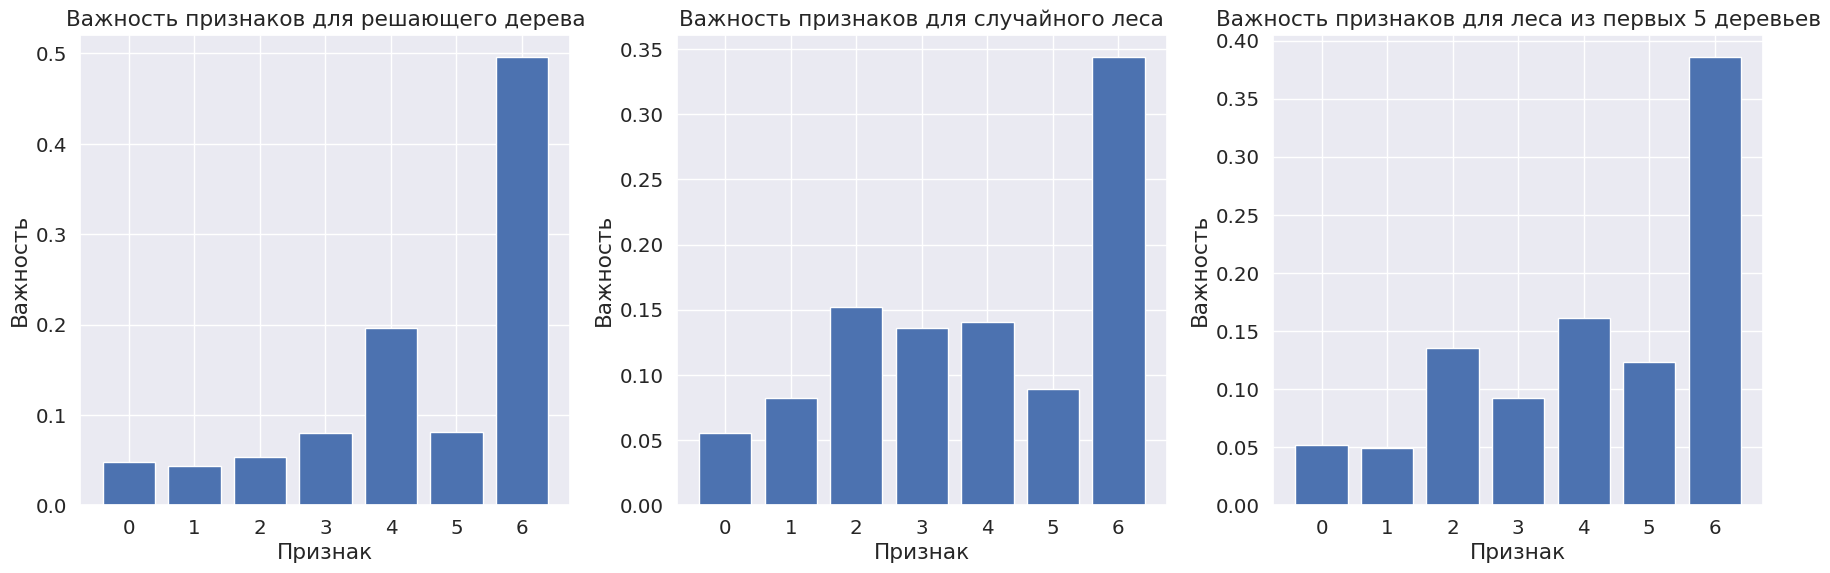

In [44]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"MSE для решающего дерева: {mse_dt}")

rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=3, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"MSE для случайного леса: {mse_rf}")

rf_small = RandomForestRegressor(n_estimators=5, max_depth=max_depth, max_features=3, random_state=42)
rf_small.fit(X_train, y_train)
y_pred_rf_small = rf_small.predict(X_test)
mse_rf_small = mean_squared_error(y_test, y_pred_rf_small)
print(f"MSE для леса из первых 5 деревьев: {mse_rf_small}")

importances_dt = dt.feature_importances_

importances_rf = rf.feature_importances_

importances_rf_small = rf_small.feature_importances_

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(range(len(importances_dt)), importances_dt)
plt.title('Важность признаков для решающего дерева')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.xticks(range(len(importances_dt)))

plt.subplot(1, 3, 2)
plt.bar(range(len(importances_rf)), importances_rf)
plt.title('Важность признаков для случайного леса')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.xticks(range(len(importances_rf)))

plt.subplot(1, 3, 3)
plt.bar(range(len(importances_rf_small)), importances_rf_small)
plt.title('Важность признаков для леса из первых 5 деревьев')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.xticks(range(len(importances_rf_small)))

plt.tight_layout()
plt.show()

**Ответ:**

важность признаков для решающего дерева определяется на основе того, как часто и насколько значимо каждый признак используется для разбиения в дереве. последний признак самый значимый, остальные много меньше, этоо не очень хорошо, потому что могут упускаться важные зависимости.

важность признаков для случайного леса определяется на основе усреднения важностей признаков по всем деревьям в лесу. тут остальные признаки по сравнению с последним подросли, это хорошо.

важность признаков для леса из первых 5 деревьев аналогично.
у случайного леса mse меньше по сравнению с решающим деревом, так как он уменьшает риск переобучения.
лес из первых 5 деревьев показывает промежуточное значение mse.



### Задача 2

На лекции была получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите случайный лес и беггинг на моделях ридж-регрессии.


Для реализации данного эксперимента используйте класс беггинг-модели
`sklearn.ensemble.BaggingRegressor` , у которого используйте следующие поля:
* `base_estimator` — базовая модель;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Эти модели можно получить с помощью поля `estimators_` у обученной беггинг-модели. Корреляции моделей можно смотреть как корреляции векторов их предсказаний.

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним. Какую оценку коэффициента корреляции вы используете и почему?

In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge

base_model = Ridge()
base_model.fit(X_train, y_train)
base_predictions = base_model.predict(X_test)

In [48]:
bagging_model = BaggingRegressor(estimator=Ridge(), n_estimators=100, max_features=1.0, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

In [49]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

оценим корреляцию:

In [50]:
base_estimators = bagging_model.estimators_
base_estimators_predictions = np.array([estimator.predict(X_test) for estimator in base_estimators])
correlation_matrix = np.corrcoef(base_estimators_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarni

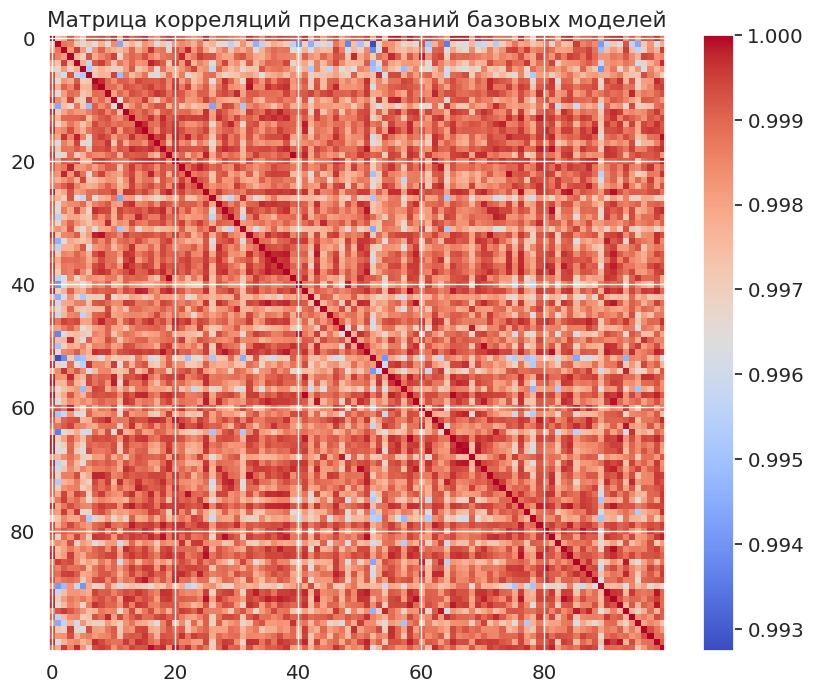

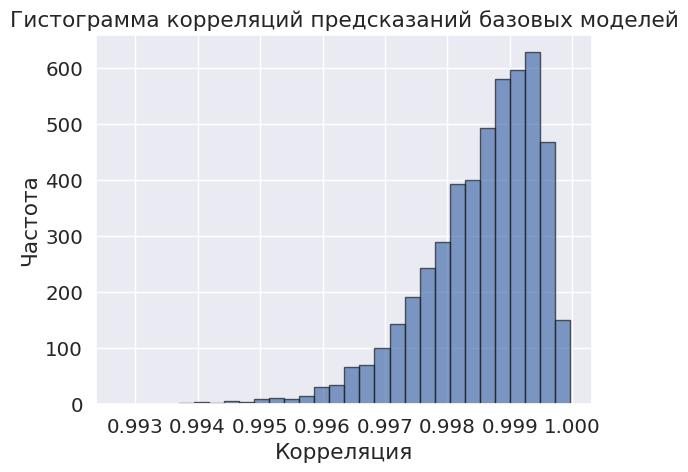

In [51]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Матрица корреляций предсказаний базовых моделей')
plt.show()


correlations = correlation_matrix[np.triu_indices_from(correlation_matrix, k=1)]
plt.hist(correlations, bins=30, edgecolor='k', alpha=0.7)
plt.title('Гистограмма корреляций предсказаний базовых моделей')
plt.xlabel('Корреляция')
plt.ylabel('Частота')
plt.show()


In [53]:
base_variance = np.var(base_predictions)
bagging_variance = np.var(bagging_predictions)
rf_variance = np.var(rf_predictions)

print(f"разброс предсказаний одной базовой модели: {base_variance}")
print(f"разброс предсказаний беггинг-модели: {bagging_variance}")
print(f"разброс предсказаний случайного леса: {rf_variance}")

разброс предсказаний одной базовой модели: 5.476710651223921
разброс предсказаний беггинг-модели: 5.475270580693602
разброс предсказаний случайного леса: 6.782644148806116


вообще ожидалось, что будто бы беггинг-модель должна уменьшить разброс, но из-за того что предсказания базовых моделей коррелируют друг с другом (убедились по матрице и гистограмме), разброс не сильно уменьшился.

однакоо разброс у базовой модели и беггинг-модели намного меньше, чем у случайного леса. вероятно это случилось из-за того, что у леса бОльшая вариативность, он более чувствителен к шуму.